# HighDensityRegionAlgorithm

In this document, we demonstrate the 2-dimensional high density region algorithm with `othdrplot`. We use a bidimensional sample generated from a mixture of two Gaussian distributions. The sample has 1000 points. Then we use the `HighDensityRegionAlgorithm` to see the regions of highest densities and classify the points into two classes: the ouliers, which have low density, and inliers. 

The classification is based on the minimum volume level set of given level $\alpha$. 

Given $\alpha \in [0,1]$, the minimum volume level set algorithm searches for $p \in [0, 1]$ with:
$$
P(X \in A(p)) = \alpha,
$$
where
$$
A(p)=\{X \in \mathbb{R}^n \; | \; f(x) > p\}.
$$
In other words, given a level set $\alpha$, we are looking for the probability density value $p$ so that the probability to have a point density greater or equal to $p$ is $\alpha$.

In [1]:
import os
import openturns as ot
import othdrplot as othdr
import openturns.viewer as otv

The minimum volume level set computation requires a sampling which can be costly with the default value of the parameters, due to a huge sampling size. Hence, we reduce it to 500.

In [2]:
numberOfPointsForSampling = 500
ot.ResourceMap.SetAsBool("Distribution-MinimumVolumeLevelSetBySampling", True)
ot.ResourceMap.Set(
    "Distribution-MinimumVolumeLevelSetSamplingSize", str(numberOfPointsForSampling)
)

Load the csv data file.

In [3]:
filename = os.path.join(othdr.__path__[0], "data/gauss-mixture.csv")
sample = ot.Sample.ImportFromCSVFile(filename)
sample

class=Sample name=/home/devel/GIT/othdrplot/othdrplot/data/gauss-mixture.csv implementation=class=SampleImplementation name=/home/devel/GIT/othdrplot/othdrplot/data/gauss-mixture.csv size=1000 dimension=2 description=[X0,X1] data=[[0.806851,-1.69008],[2.22223,-1.95101],[1.75679,-0.88062],...,[-0.144572,-1.75943],[0.812519,-2.3216],[-0.525143,2.01341]]

In order to run the algorithm, we must estimate the distribution of the data. In this example, we use a density KernelSmoothing estimator.

In [4]:
myks = ot.KernelSmoothing()
distribution = myks.build(sample)

We can draw a cloud from this bi-dimensional sample.

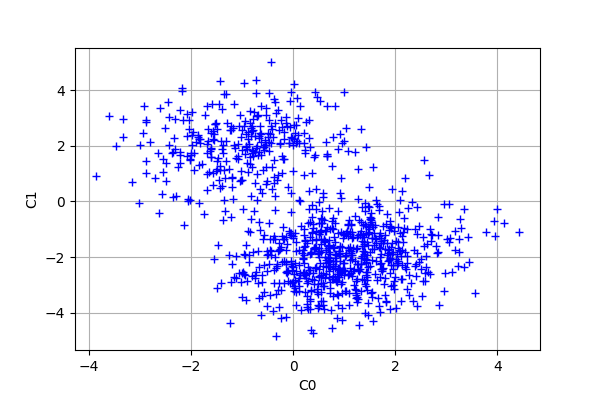

In [5]:
graph = ot.Graph("", "C0", "C1", True)
cloud = ot.Cloud(sample)
graph.add(cloud)
graph

The `HighDensityRegionAlgorithm` plots the regions of high density, with red points as outliers. 

In [6]:
mydp = othdr.HighDensityRegionAlgorithm(sample, distribution)
mydp.run()

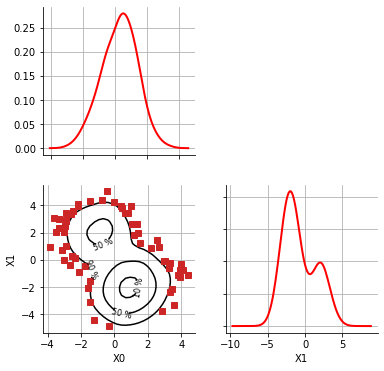

In [7]:
grid = mydp.draw()
view = otv.View(grid).getFigure().set_size_inches(6.0, 6.0)

We can plot the inliers as well as green points.

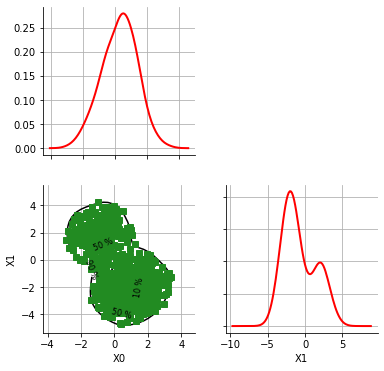

In [8]:
grid = mydp.draw(drawInliers=True, drawOutliers=False)
view = otv.View(grid).getFigure().set_size_inches(6.0, 6.0)

Or both.

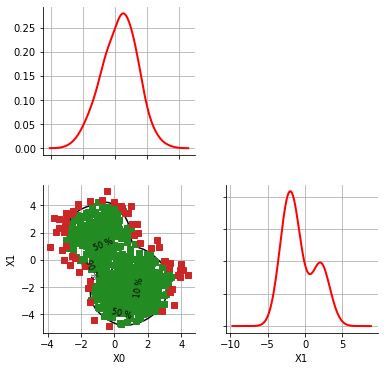

In [9]:
grid = mydp.draw(drawInliers=True, drawOutliers=True)
view = otv.View(grid).getFigure().set_size_inches(6.0, 6.0)

By default the `computeIndices` method computes the indices of the outliers in the sample. 
The following prints the 10 first outlier indices.

In [10]:
outlierIndices = mydp.computeIndices()
print("Total number of outliers :", len(outlierIndices))
outlierIndices[:10]

Total number of outliers : 58


[31, 60, 84, 105, 116, 121, 150, 151, 200, 207]

The boolean optional argument of `computeIndices` can be used to get the inliers if necessary.

In [11]:
inlierIndices = mydp.computeIndices(False)
print("Total number of inliers :", len(inlierIndices))
inlierIndices[:10]

Total number of inliers : 942


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

The `computeIndices` method can be used to make the link with other applications of the HDR algorithm, e.g. to classify a set of curves. In this case, the sample represents the projection of the curves onto a functional basis. The `HighDensityRegionAlgorithm` can then be used to visualize the projection curves of the curves in the reduced space. 